In [4]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Loading required package: ISLR


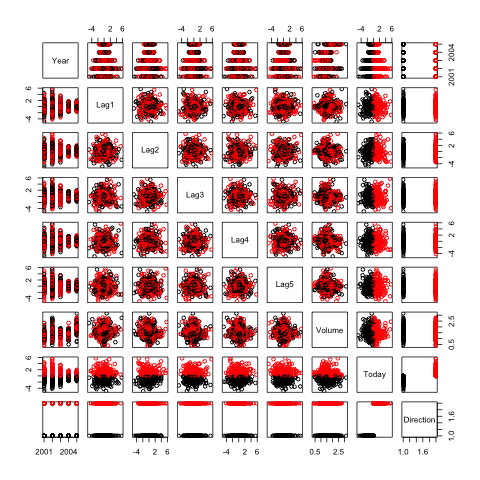

In [5]:
%%R
require(ISLR)
# Logistic Regression
pairs(Smarket, col=Smarket$Direction)

In [13]:
%%R
?Smarket

R Help on ‘Smarket’Smarket                  package:ISLR                  R Documentation

_S&_P _S_t_o_c_k _M_a_r_k_e_t _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Daily percentage returns for the S&P 500 stock index between 2001
     and 2005.

_U_s_a_g_e:

     Smarket
     
_F_o_r_m_a_t:

     A data frame with 1250 observations on the following 9 variables.

     ‘Year’ The year that the observation was recorded

     ‘Lag1’ Percentage return for previous day

     ‘Lag2’ Percentage return for 2 days previous

     ‘Lag3’ Percentage return for 3 days previous

     ‘Lag4’ Percentage return for 4 days previous

     ‘Lag5’ Percentage return for 5 days previous

     ‘Volume’ Volume of shares traded (number of daily shares traded in
          billions)

     ‘Today’ Percentage return for today

     ‘Direction’ A factor with levels ‘Down’ and ‘Up’ indicating
          whether the market had a positive or negative return on a
          given day

_

In [10]:
%%R
glm.fit <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3



In [11]:
%%R
glm.probs <- predict(glm.fit, type="response")
glm.probs[1:5]

        1         2         3         4         5 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 


In [14]:
%%R
glm.preds <- ifelse(glm.probs>0.5, "Up", "Down")
attach(Smarket)
table(glm.preds, Direction)

The following objects are masked from Smarket (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

         Direction
glm.preds Down  Up
     Down  145 141
     Up    457 507


In [16]:
%%R
mean(glm.preds==Direction)

[1] 0.5216


In [20]:
%%R
train = Year<2005
glm.fit <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial, subset=train)
glm.probs <- predict(glm.fit, newdata=Smarket[!train,], type="response")
glm.pred = ifelse(glm.probs>0.5, "Up", "Down")
Direction.2005=Smarket$Direction[!train]
table(glm.pred, Direction.2005)
mean(glm.pred==Direction.2005)

[1] 0.4801587


In [21]:
%%R
glm.fit <- glm(Direction~Lag1+Lag2, data=Smarket, family=binomial, subset=train)
glm.probs <- predict(glm.fit, newdata=Smarket[!train,], type="response")
glm.pred = ifelse(glm.probs>0.5, "Up", "Down")
Direction.2005=Smarket$Direction[!train]
table(glm.pred, Direction.2005)
mean(glm.pred==Direction.2005)

[1] 0.5595238


In [22]:
%%R
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = Smarket, 
    subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.345  -1.188   1.074   1.164   1.326  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.03222    0.06338   0.508    0.611
Lag1        -0.05562    0.05171  -1.076    0.282
Lag2        -0.04449    0.05166  -0.861    0.389

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.4  on 995  degrees of freedom
AIC: 1387.4

Number of Fisher Scoring iterations: 3

